In [1]:
import pandas as pd
import fsrs_optimizer

timezone = "Asia/Shanghai"
next_day_starts_at = 4
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

In [2]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Archive.apkg", filter_out_suspended_cards, filter_out_flags
)
analysis = optimizer.create_time_series(timezone, revlog_start_date, next_day_starts_at)
print(analysis)
S0_dataset_group_1 = optimizer.S0_dataset_group.copy()
df1 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df1.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/4879 [00:00<?, ?it/s]

Trainset saved.
Retention calculated.


  0%|          | 0/7048 [00:00<?, ?it/s]

Stability calculated.


analysis:   0%|          | 0/235 [00:00<?, ?it/s]

Analysis saved!
1:again, 2:hard, 3:good, 4:easy
first_rating  i         r_history  avg_interval  avg_retention  stability  factor  group_cnt
           1  2           (1,3,3)           1.0          0.895        1.0     inf        366
           1  3         (1,3,3),3           3.1          0.921        4.2    4.20        306
           1  4       (1,3,3),3,3           7.6          0.951       15.9    3.79        244
           1  5     (1,3,3),3,3,3          18.5          0.858       13.9    0.87        163
           3  2               (3)           1.0          0.971        3.8     inf        170
           3  2             (3,3)           1.0          0.972        4.3     inf       1364
           3  2           (3,3,3)           1.0          0.990       13.4     inf        112
           3  3             (3),3           1.0          0.917        1.5    0.39        146
           3  3           (3,3),3           3.1          0.968       11.2    2.60       1231
           3  4       

In [3]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Learning.apkg", filter_out_suspended_cards, filter_out_flags
)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False
)
S0_dataset_group_2 = optimizer.S0_dataset_group.copy()
df2 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df2.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/5459 [00:00<?, ?it/s]

Trainset saved.
(65224, 12)


In [4]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_1
optimizer.pretrain(dataset=df1.copy(), verbose=False)
optimizer.train(verbose=False)
df1 = optimizer.dataset.copy()
w1 = optimizer.w

  0%|          | 0/28850 [00:00<?, ?it/s]

In [5]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_2
optimizer.pretrain(df2.copy(), verbose=False)
optimizer.train(verbose=False)
df2 = optimizer.dataset.copy()
w2 = optimizer.w

  0%|          | 0/59765 [00:00<?, ?it/s]

In [6]:
optimizer.define_model()
optimizer.S0_dataset_group = pd.concat(
    [S0_dataset_group_1, S0_dataset_group_2])
optimizer.pretrain(pd.concat([df1, df2]), verbose=False)
optimizer.train(verbose=False)
df3 = optimizer.dataset.copy()
w3 = optimizer.w

  0%|          | 0/88615 [00:00<?, ?it/s]

In [7]:
print(w1, w2, w3, sep="\n")
print(df1.shape, df2.shape, df3.shape, sep="\n")

[1.0373, 0.6539, 4.4217, 10.5378, 7.3, 0.7824, 2.45, 0.001, 1.4611, 0.0863, 0.9728, 1.987, 0.0969, 0.4259, 2.3768, 0.0207, 3.2141, 0.0563, 0.4595]
[1.0327, 2.5177, 8.773, 14.2319, 7.9422, 0.5087, 2.4422, 0.006, 1.2307, 0.0751, 0.7522, 2.1405, 0.0061, 0.3004, 1.4677, 0.0, 3.3543, 0.1812, 0.6385]
[1.0785, 1.4359, 7.6356, 12.4764, 7.7363, 0.6643, 2.8592, 0.0043, 1.3115, 0.1084, 0.844, 2.1497, 0.0016, 0.3099, 1.2767, 0.0, 3.441, 0.1432, 0.6759]
(28850, 15)
(59765, 15)
(88615, 15)


log loss: 0.2993
RMSE(bins): 0.0217

Last rating: 1
RMSE(bins): 0.0391

Last rating: 2
RMSE(bins): 0.0627

Last rating: 3
RMSE(bins): 0.0251

Last rating: 4
RMSE(bins): 0.0318


({'all': {'R-squared': 0.9774044890816715,
   'MAE': 0.0064609117437122165,
   'ICI': 0.004089540966769912,
   'E50': 0.004159247137304867,
   'E90': 0.00603143567371598,
   'EMax': 0.1048085113755205,
   'RMSE(bins)': 0.021723660378438578,
   'AUC': 0.7247210379172471},
  1: {'R-squared': 0.6189278064563999,
   'MAE': 0.021751801160078778,
   'ICI': 0.020330421357724164,
   'E50': 0.018593429682899676,
   'E90': 0.026957379408843306,
   'EMax': 0.3834962772035604,
   'RMSE(bins)': 0.03906723768442087,
   'AUC': 0.6402628722770223},
  2: {'R-squared': 0.7395906056576163,
   'MAE': 0.04169570707512342,
   'ICI': 0.03866573999459176,
   'E50': 0.0424303546227871,
   'E90': 0.04784805552098892,
   'EMax': 0.04825020780382472,
   'RMSE(bins)': 0.06265886722799834,
   'AUC': 0.6733739523379084},
  3: {'R-squared': 0.9628727246400688,
   'MAE': 0.011165701094245122,
   'ICI': 0.00874699962146207,
   'E50': 0.009642979828228926,
   'E90': 0.014613714782063724,
   'EMax': 0.034588861273468635,

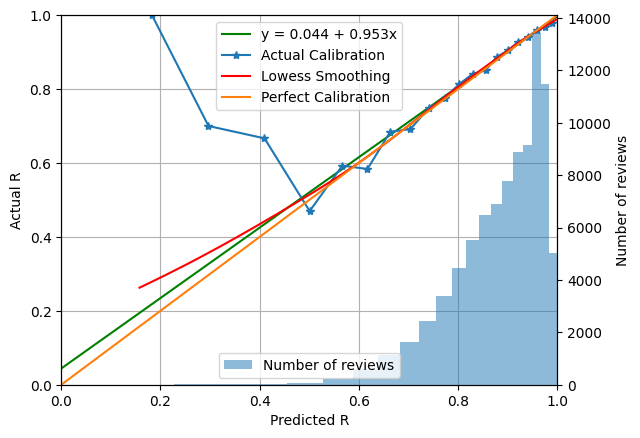

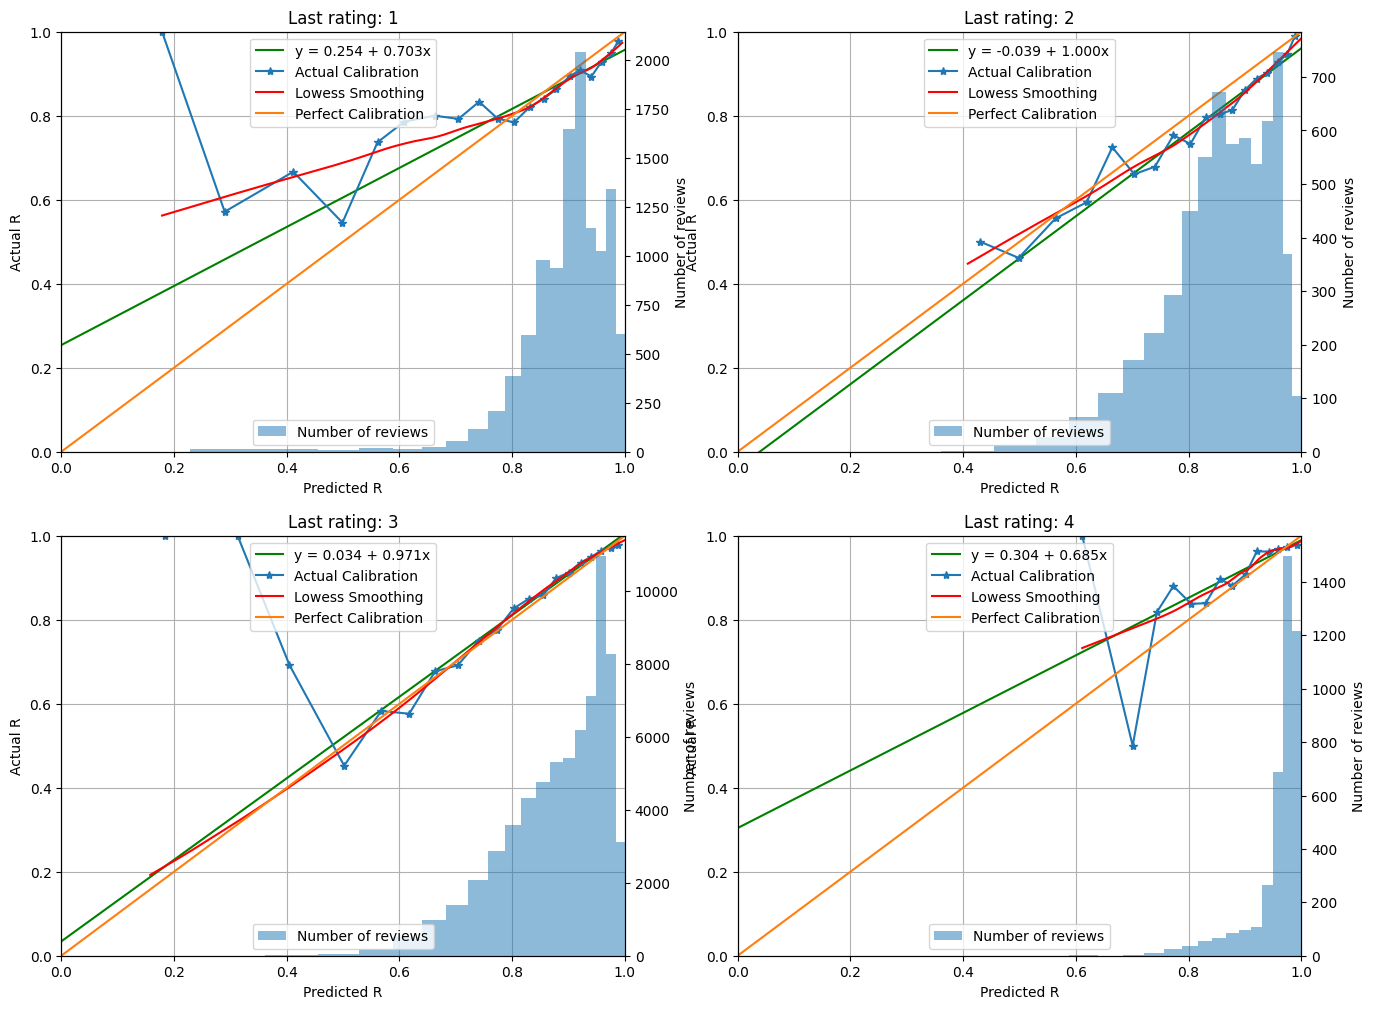

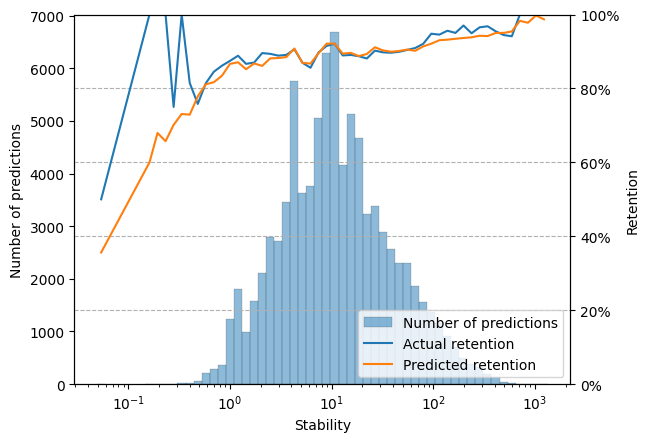

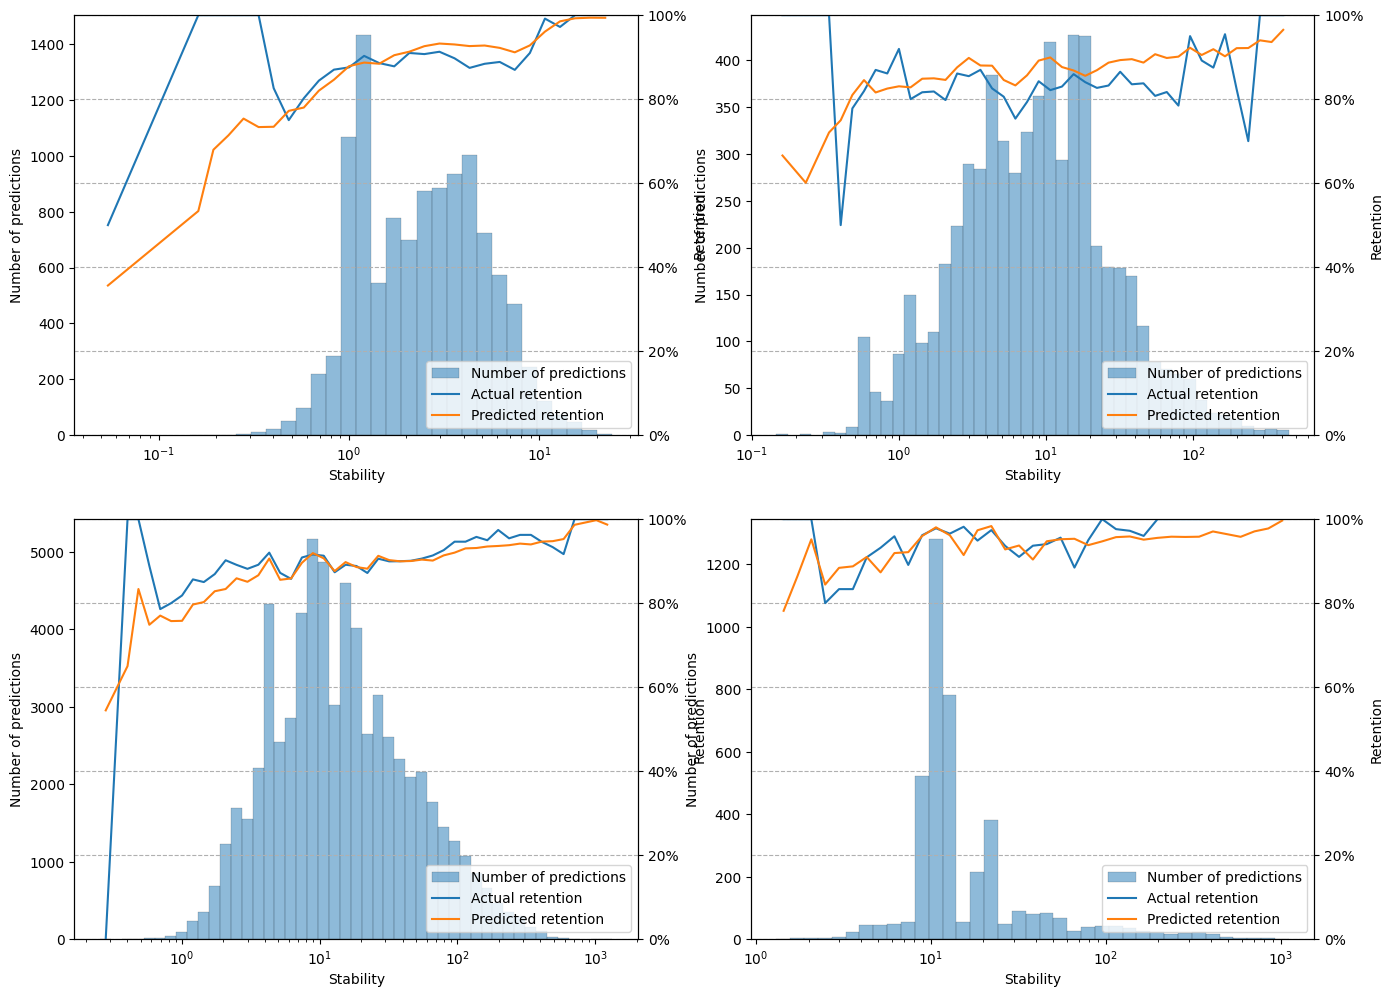

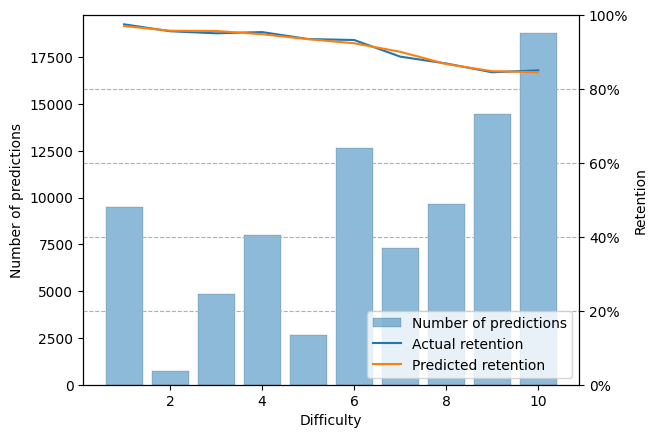

In [8]:
from fsrs_optimizer import Collection, power_forgetting_curve
from sklearn.metrics import log_loss

my_collection = Collection(w1)
stabilities, difficulties = my_collection.batch_predict(df1)
df1["stability"] = stabilities
df1["difficulty"] = difficulties
df1["p"] = power_forgetting_curve(df1["delta_t"], df1["stability"])

my_collection = Collection(w2)
stabilities, difficulties = my_collection.batch_predict(df2)
df2["stability"] = stabilities
df2["difficulty"] = difficulties
df2["p"] = power_forgetting_curve(df2["delta_t"], df2["stability"])

df_join = pd.concat([df1, df2])
print(f"log loss: {log_loss(df_join['y'], df_join['p']):.4f}")
optimizer.calibration_graph(df_join)

log loss: 0.3005
RMSE(bins): 0.0212

Last rating: 1
RMSE(bins): 0.0409

Last rating: 2
RMSE(bins): 0.0651

Last rating: 3
RMSE(bins): 0.0243

Last rating: 4
RMSE(bins): 0.0307


({'all': {'R-squared': 0.9706125362686174,
   'MAE': 0.005505842587038345,
   'ICI': 0.0036143141825642432,
   'E50': 0.0024425350386941824,
   'E90': 0.008693876331753225,
   'EMax': 0.15995369812808857,
   'RMSE(bins)': 0.02124614229868654,
   'AUC': 0.7211715226306596},
  1: {'R-squared': 0.5270100925301751,
   'MAE': 0.023578182808863018,
   'ICI': 0.022399400934374855,
   'E50': 0.020538232163565207,
   'E90': 0.027492741129467868,
   'EMax': 0.4726187939207144,
   'RMSE(bins)': 0.040930172134932115,
   'AUC': 0.6385637209640662},
  2: {'R-squared': 0.6659391787569616,
   'MAE': 0.044806598259090814,
   'ICI': 0.042570499917978226,
   'E50': 0.04494998817668261,
   'E90': 0.05343307803424058,
   'EMax': 0.07561943232026402,
   'RMSE(bins)': 0.06505316439409206,
   'AUC': 0.6651347587072018},
  3: {'R-squared': 0.9639078585781633,
   'MAE': 0.010406887138694651,
   'ICI': 0.008035067897240605,
   'E50': 0.008820348216508012,
   'E90': 0.011697507867561895,
   'EMax': 0.037173311682

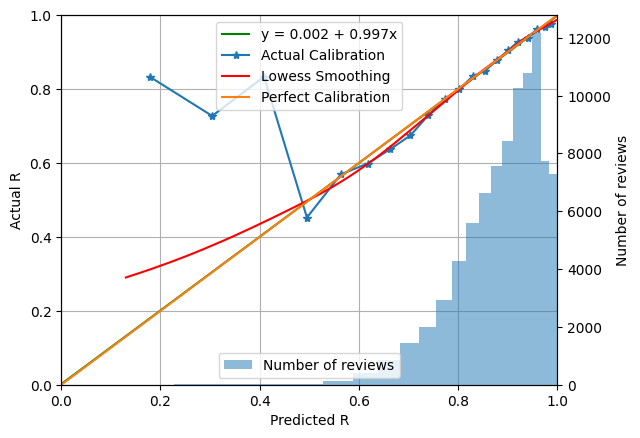

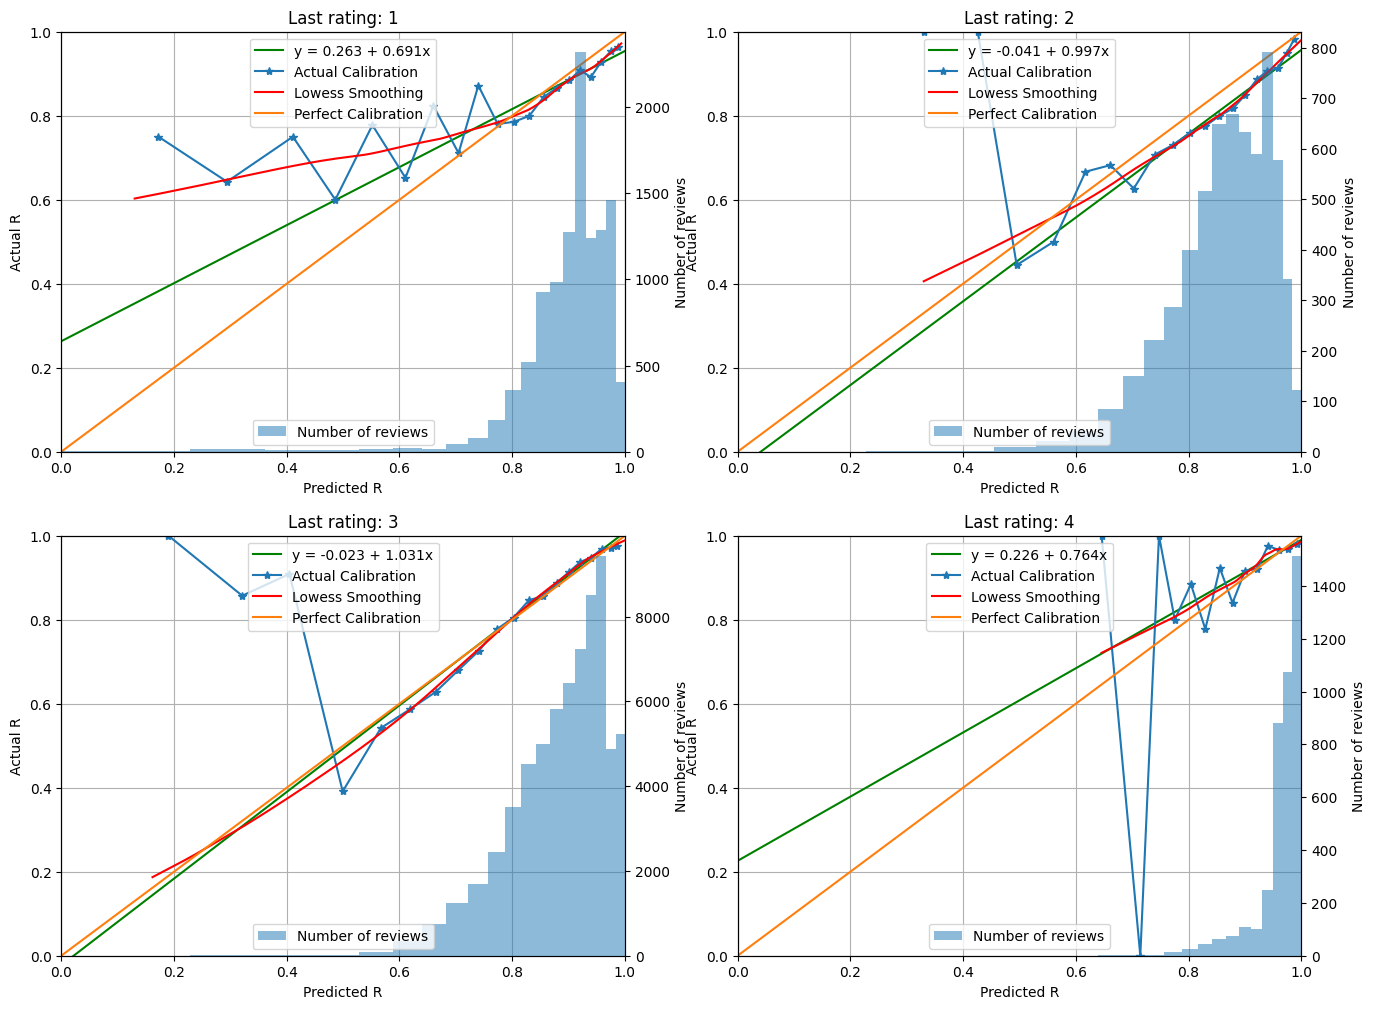

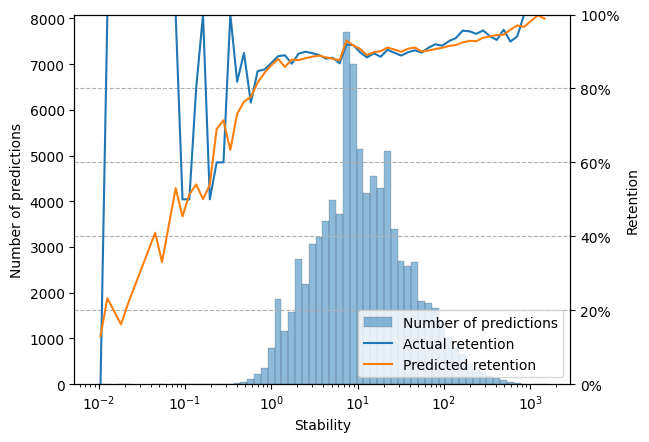

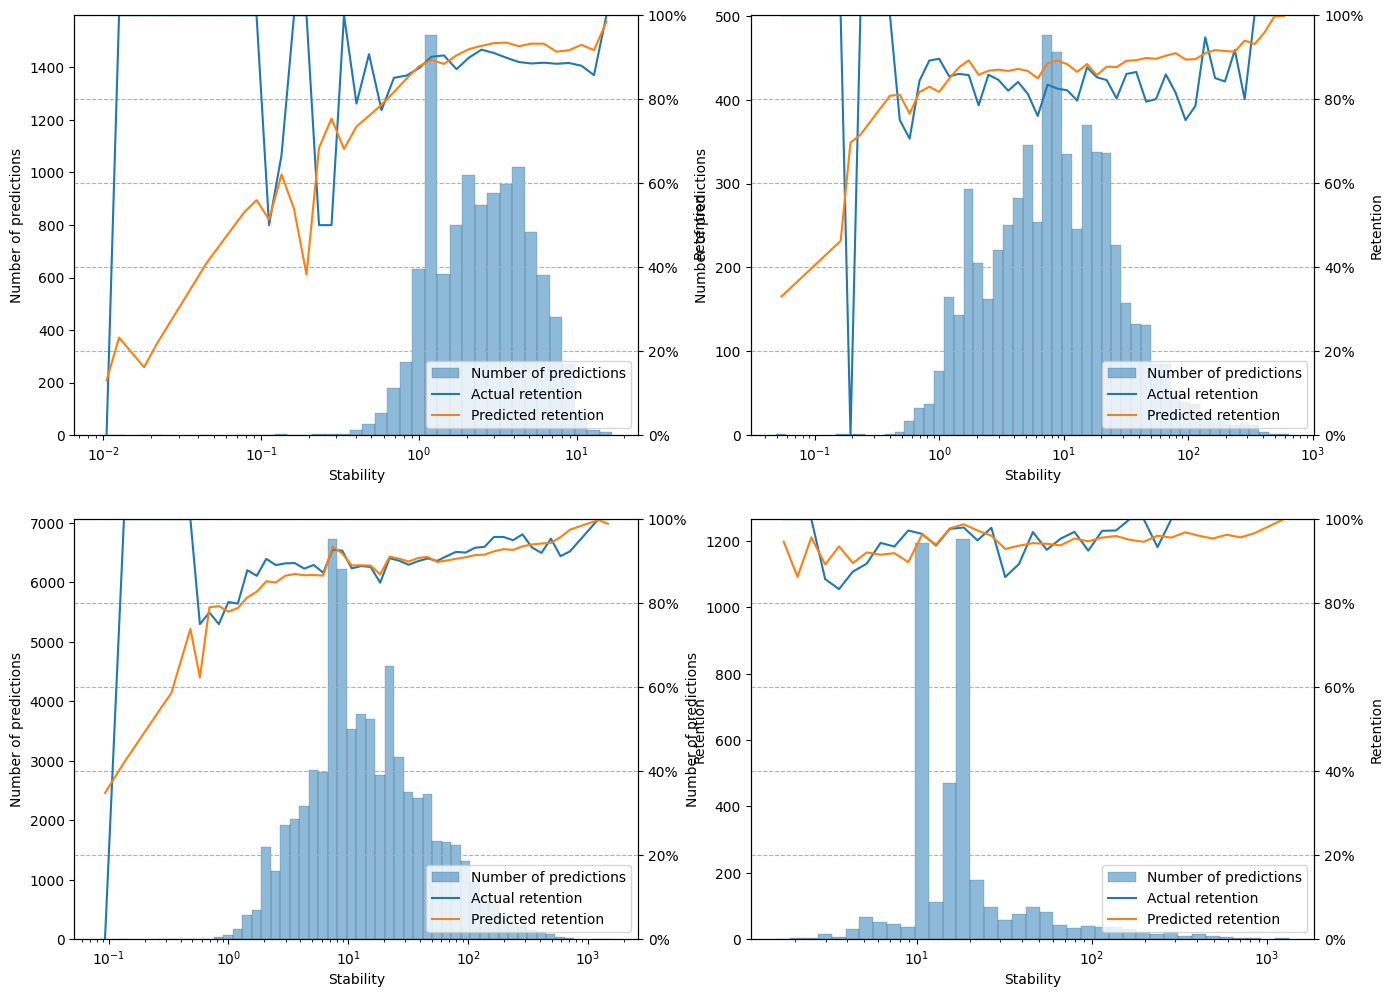

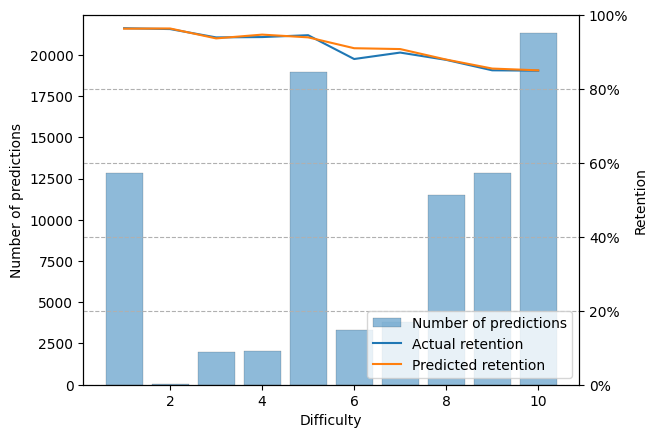

In [9]:
my_collection = Collection(w3)
stabilities, difficulties = my_collection.batch_predict(df3)
df3["stability"] = stabilities
df3["difficulty"] = difficulties
df3["p"] = power_forgetting_curve(df3["delta_t"], df3["stability"])
print(f"log loss: {log_loss(df3['y'], df3['p']):.4f}")
optimizer.calibration_graph(df3)